# Description of Pima Diabetes Dataset

Diabetes mellitus is a group of metabolic disorders characterized by abnormally high levels of blood glucose secondary to inefficient insulin action and/or secretion. The disease often leads to significant disability, including renal failure, blindness, and limb amputation, and to premature death. Diabetes occuring in Native Americans is almost exclusively the type referred to as NIDDM (Non-insulin-dependent-Diabetes Mellitus). The Pima indians have the highest recorded prevalence and incidence of NIDDM in the world.

In this project we have to use Naïve Bayes Classifier model to predict diabetes among Pima Indians. The Sample data is available at https://archive.ics.uci.edu/ml/datasets/Adult

The given dataset contains the following columns :

1. 'Preg' = Number of times pregnent
2. 'Plas' = Plasma Glucose concentration (a 2 hours in an oral glucose tolerance test)
3. 'Pres' = Diastolic blood pressure (mm.Hg)
4. 'Skin' = Tricep's skin fold thickness
5. 'test' = 2 hour serum insulin (mu U/ml)
6. 'mass' = Body mass index (weight in Kg/(square of height))
7. 'Pedi'
8. 'age' = in years
9. 'Class' = Class Variable 0 or 1, where 1 means Diabetic patient and 0 means not.

Steps followed for this project work :

1. Load  the dataset.
2. Understand the structure of dataset.
3. Plot various graphs to explore the dataset.
4. Use descriptive statistics elements to describe the dataset
5. Relation between various attributes
6. Use Naïve Bayes Classifier model to predict.
7. State your insights from the dataset.

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

# 1. Load  the dataset

In [2]:
#Getting the Data from the .csv file
db=pd.read_csv('pima-indians-diabetes-1.csv')

In [3]:
#Checking first 6 rows
db.head(6)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#Checking last 6 rows
db.tail(6)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# 2. Understand the structure of dataset

In [5]:
# understand shape and size of dataset
print(db.shape)
print (db.size)

(768, 9)
6912


In [6]:
#get more information about dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Details of the Dataset
db.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking the distribution between Diabetic (class=='1') and Non-diabetic (class=='0')
db.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Hence the dataset contains Diabetic (class=='1') and Non-diabetic (class=='0') in nearly 2:1 ratio .

In [9]:
#Checking the null values, and if there is null value present then drop those columns
val=db.isnull().values.any()

if val==True:
    print("Missing/NaN values present", db.isnull().values.sum())
    db=db.dropna()
else:
    print("No missing/NaN values")

No missing/NaN values


# 3. Plot various graphs to explore the dataset

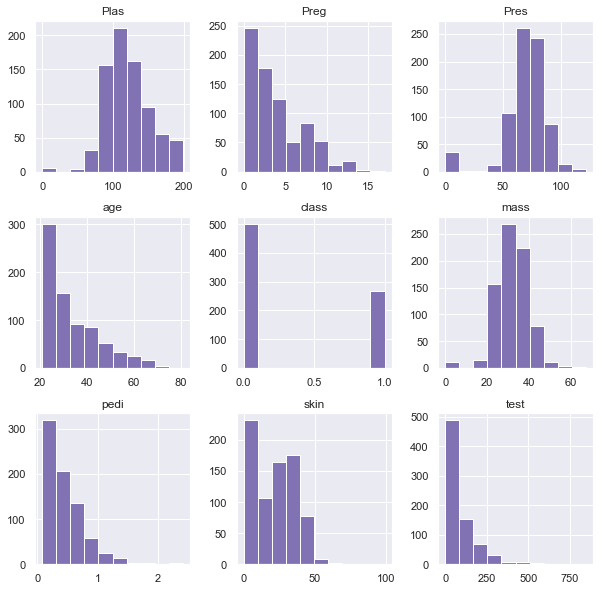

In [10]:
# plot histogram

db.hist(figsize=(10,10),color="m",grid=True)
plt.show()

# 4. Use descriptive statistics elements to describe the dataset

<Figure size 1440x720 with 0 Axes>

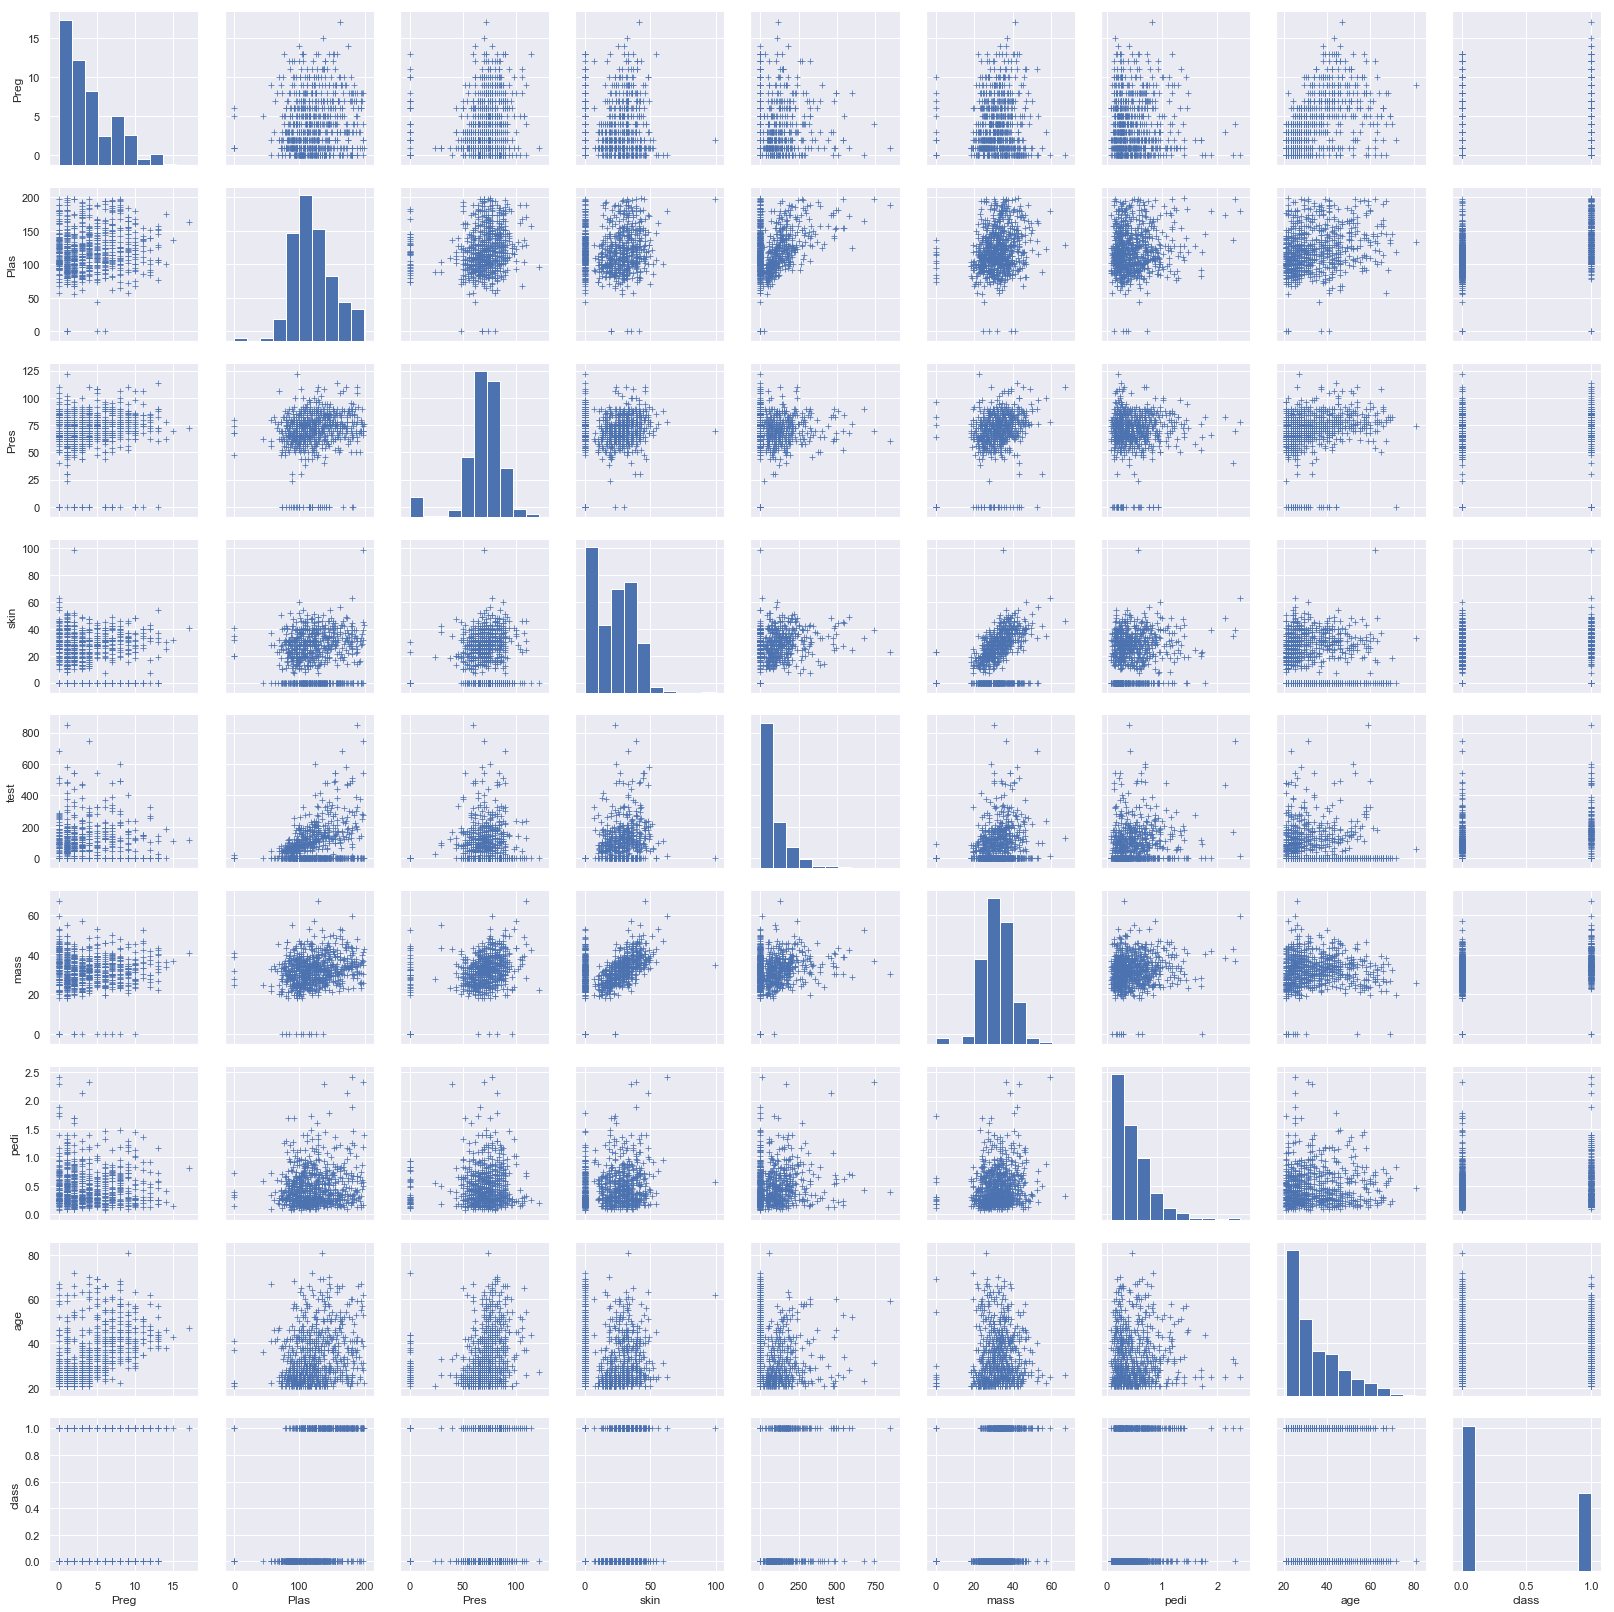

<Figure size 1440x720 with 0 Axes>

In [11]:
# pair plot
sns.pairplot(db,markers="+")
plt.figure(figsize=(20,10))

Hence, we have a greater number of 0 values for the columns Glucose, BMI, Blood Pressure, skin thickness. These are impacting the overall data. Need to replace those 0 with proper value. Otherwise we can go ahead with the values the columns Pregnencies,Insulin, DiabetesPedigreeFunction and outcome as it is.

As per the distribution, 'Plas','Pres','skin' and 'mass' are somewhat normally distributed. But 'Preg','test', 'medi' are exponentially distributed. From the dataset, we can see that there is no obvious relationship between age and diabetes.

# 5. Find relationship between various attributes

In [12]:
#Checking the corelation coefficient
cor=db.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


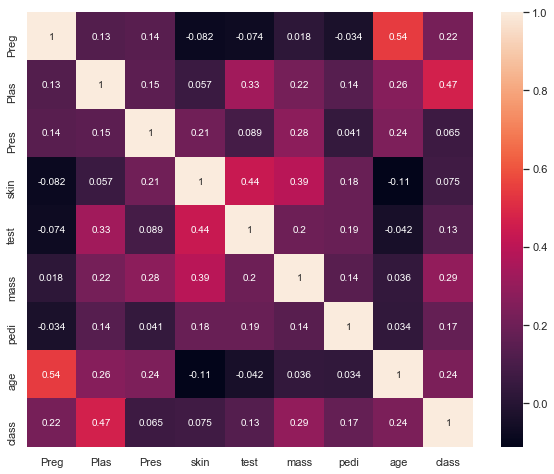

In [13]:
#Plotting the Heatmap with the variables
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

From the above heatmap, we can takeaway the following features : (the darker the box, less the corelation between them)
    1. Preg and test has the least (negative) corelation of -0.074
    2. Highest (positive) corelation is between Age and Preg of 0.54

# 6. Use Naïve Bayes Classifier model to predict.

In [14]:
# Converted the dataset to array
array=db.values

In [15]:
# X=array[:,0:8], select all rows and first 8 coulmns which are attributes
X=db.iloc[:,0:8]
# y=array[:,8], select all rows and 8th coulmn which is the classification for diabetic
y=db.iloc[:,8]

In [16]:
# Dividing the dataset to train and test data set in 7 : 3 ratio 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
# Using the Bernoulli Naive Bayes Classifier 
BNB = BernoulliNB(binarize=True)
BNB.fit(X_train, y_train)
print(BNB)
y_predict = BNB.predict(X_test)
Acc_BNB = accuracy_score(y_test, y_predict)
print(Acc_BNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.6103896103896104


In [18]:
# Using the Multinomial Naive Bayes Classifier
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
print(MNB)
y_predict = MNB.predict(X_test)
Acc_MNB = accuracy_score(y_test, y_predict)
print(Acc_MNB)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.5454545454545454


In [19]:
# Using the Gausian Naive Bayes Classifier
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print(GNB)
y_predict = GNB.predict(X_test)
Acc_GNB = accuracy_score(y_test, y_predict)
print(Acc_GNB)

GaussianNB(priors=None, var_smoothing=1e-09)
0.7835497835497836


As we can see that the Gaussian naive Bayes is giving a better result here. 

## Cleaning the dataset for rechecking the result

In [20]:
# After the removal of 0 values from the dataset
db1=db[db.Plas !=0]
db2=db[db.mass !=0]
db3=db[db.Pres !=0]
db4=db[db.skin !=0]

There are several methods to reduce/remove outliers for a particular dataset. In our case it is 0. For logical outlier removal we can replace the zero values with the mean of the nonzero rows. (Better approach would be to remove the outliers depending on the value of other specific column/columns )

In [21]:
# Storing the mother dataset to another dataset for modifications
db_clean = db

In [22]:
#Replacing the 0 values for the mentioned columns with mean value of that columns
db_clean['Plas'].replace([0],[db1['Plas'].mean()],inplace=True)
db_clean['mass'].replace([0],[db2['mass'].mean()],inplace=True)
db_clean['Pres'].replace([0],[db3['Pres'].mean()],inplace=True)
db_clean['skin'].replace([0],[db4['skin'].mean()],inplace=True)

In [23]:
# X=array[:,0:8], select all rows and first 8 coulmns which are attributes
X_c=db_clean.iloc[:,0:8]
# y=array[:,8], select all rows and 8th coulmn which is the classification for diabetic
y_c=db_clean.iloc[:,8]

In [24]:
# Dividing the dataset to train and test data set in 7 : 3 ratio 
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c ,y_c, test_size=0.3,random_state=1)

In [25]:
# Using the Bernoulli Naive Bayes Classifier 
BNB_c = BernoulliNB(binarize=True)
BNB_c.fit(X_train_c, y_train_c)
print(BNB_c)
y_predict_c = BNB_c.predict(X_test_c)
Acc_BNB_c = accuracy_score(y_test_c, y_predict_c)
print(Acc_BNB_c)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.6493506493506493


In [26]:
# Using the Multinomial Naive Bayes Classifier
MNB_c = MultinomialNB()
MNB_c.fit(X_train_c, y_train_c)
print(MNB_c)
y_predict_c = MNB_c.predict(X_test_c)
Acc_MNB_c = accuracy_score(y_test_c, y_predict_c)
print(Acc_MNB_c)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.5497835497835498


In [27]:
# Using the Gausian Naive Bayes Classifier
GNB_c = GaussianNB()
GNB_c.fit(X_train_c, y_train_c)
print(GNB_c)
y_predict_c = GNB_c.predict(X_test_c)
Acc_GNB_c = accuracy_score(y_test_c, y_predict_c)
print(Acc_GNB_c)

GaussianNB(priors=None, var_smoothing=1e-09)
0.7705627705627706


No considerable change can be seen here. Accuracy score is somewhat same for both the dataset.

# 7. Stating Insights with Reasons behind NIDDM (As per medical Experimental Reports)

There may be various reasons behind this. Some are explained below : 
    1. There may be a genetic susceptibility to diabetes ,
    2. The risk of diabetes occuring at an early age is strongly transmitted from parent to offspring, but diabetes occuring at an older age in parents has less effect on the risk of diabetes in offspring,
    3. For Pima tribe diabetes is remarkably frequent at younger ages and other tribes,
    4. Obesity in Pima actually aids in having diabetes, (hence BMI high means greater risk of diabetes)
    5. Diet has a direct impact with diabetes, a high fat diet may be related to the development of this disease,
    6. There is evidence that increased physical activity may have a protective effect on the development of NIDDM,
    7. Since a large proportion of subjects with NIDDM remain undiagnosed and might benefit from this data, (by early detectio and taking early precautions)
    8. Blood Glucose control is also very important for these kind of patients.